## Week 2 Coding Tasks

First, you'll work with a dataset containing the number of primary care physicians per county for each county in the United States. It was obtained from the Area Health Resources File, published by the [Health Resources and Services Administration](https://data.hrsa.gov/topics/health-workforce/ahrf). This data is contained in the file `primary_care_physicians.csv`.

Second, the file `population_by_county.csv` contains the Census Bureau's 2019 population estimates for each US County. It also contains a column `urban`. The `urban` column uses data from the National Bureau of Economic Research to classify each county as either urban or rural. The U.S. Office of Management and Budget designates counties as metropolitan (a core urban area of 50,000 or more population), micropolitan (an urban core of at least 10,000 but less than 50,000 population), or neither. Here, a county is considered "urban" if it is part of a metropolitan or micropolitan area and "rural" if it is not.

 1. First, import the primary care physicians dataset (`primary_care_physicians.csv`) into a data frame named `physicians`. 

In [30]:
import pandas as pd

In [31]:
physicians = pd.read_csv('../data/primary_care_physicians.csv')

In [32]:
physicians.head(2)

,FIPS,state,county,primary_care_physicians
0,1001,Alabama,Autauga,26.0
1,1003,Alabama,Baldwin,153.0


 2. Filter `physicians` down to just the counties in Tennessee. Save the filtered dataframe back to `physicians`. Verify that the resulting dataframe has 95 rows.

In [33]:
physicians = physicians.loc[physicians['state'] == 'Tennessee']

In [34]:
physicians

,FIPS,state,county,primary_care_physicians
2432,47001,Tennessee,Anderson,39.0
2433,47003,Tennessee,Bedford,15.0
2434,47005,Tennessee,Benton,3.0
2435,47007,Tennessee,Bledsoe,1.0
2436,47009,Tennessee,Blount,90.0
...,...,...,...,...
2522,47181,Tennessee,Wayne,5.0
2523,47183,Tennessee,Weakley,18.0
2524,47185,Tennessee,White,9.0
2525,47187,Tennessee,Williamson,338.0


 3. Look at the distribution of the number of primary care physicians. What do you notice?

In [35]:
physicians['primary_care_physicians'].describe()

count     95.000000
mean      51.042105
std      129.311426
min        0.000000
25%        4.500000
50%       12.000000
75%       26.500000
max      806.000000
Name: primary_care_physicians, dtype: float64

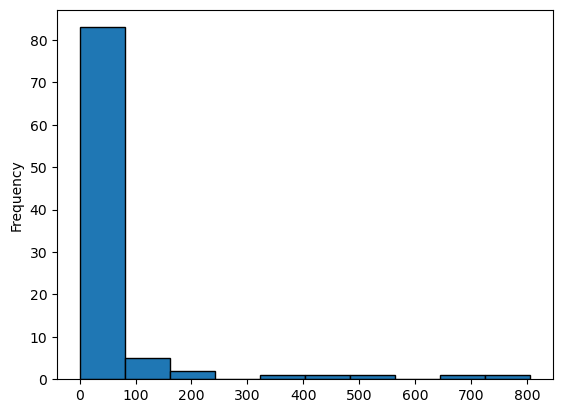

In [36]:
physicians['primary_care_physicians'].plot(kind = 'hist', edgecolor = 'black');

In [37]:
physicians.sort_values('primary_care_physicians').tail(10)

,FIPS,state,county,primary_care_physicians
2514,47165,Tennessee,Sumner,91.0
2488,47113,Tennessee,Madison,129.0
2506,47149,Tennessee,Rutherford,137.0
2513,47163,Tennessee,Sullivan,199.0
2521,47179,Tennessee,Washington,226.0
2525,47187,Tennessee,Williamson,338.0
2464,47065,Tennessee,Hamilton,403.0
2478,47093,Tennessee,Knox,520.0
2450,47037,Tennessee,Davidson,665.0
2510,47157,Tennessee,Shelby,806.0


 4. Now, import the population by county dataset (`population_by_county.csv`) into a DataFrame named `population`.

In [38]:
population = pd.read_csv('../data/population_by_county.csv')
population.head(2)

,FIPS,population,county,state,urban
0,17051,21565,Fayette County,ILLINOIS,Rural
1,17107,29003,Logan County,ILLINOIS,Rural


 5. Merge the `physicians` DataFrame with the `population` DataFrame. Keep only the values for Tennessee. When you merge, be sure the include both the `population` and `urban` columns in the merged results. Save the result of the merge back to `physicians`.

In [43]:
physicians = pd.merge(left = physicians,
         right = population.drop(columns=['county','state']),
         on = 'FIPS')

In [44]:
physicians

,FIPS,state,county,primary_care_physicians,population,urban
0,47001,Tennessee,Anderson,39.0,76061,Urban
1,47003,Tennessee,Bedford,15.0,48292,Rural
2,47005,Tennessee,Benton,3.0,16140,Rural
3,47007,Tennessee,Bledsoe,1.0,14836,Rural
4,47009,Tennessee,Blount,90.0,129927,Urban
...,...,...,...,...,...,...
90,47181,Tennessee,Wayne,5.0,16693,Rural
91,47183,Tennessee,Weakley,18.0,33510,Rural
92,47185,Tennessee,White,9.0,26800,Rural
93,47187,Tennessee,Williamson,338.0,225389,Urban


 6. How many Tennessee counties are considered urban?

In [28]:
physicians['urban'].value_counts()

Rural    57
Urban    38
Name: urban, dtype: int64

 7. The State Health Access Data Assistance Center (SHADAC) (https://www.shadac.org/) classifies counties into three groups based on the number of residents per primary care physician. First, counties with fewer than 1500 residents per primary care physician are considered to have an "adequate" supply. Counties with at least 1500 residents but fewer than 3500 residents per primary care physician are considered to have a "moderately inadequate" supply, and counties with at least 3500 residents per primary care physician are considered to have a "low inadequate" supply. How many counties in Tennessee are in each group?

In [46]:
physicians['res_per_pcp'] = physicians['population']/physicians.primary_care_physicians

In [47]:
physicians

,FIPS,state,county,primary_care_physicians,population,urban,res_per_pcp
0,47001,Tennessee,Anderson,39.0,76061,Urban,1950.282051
1,47003,Tennessee,Bedford,15.0,48292,Rural,3219.466667
2,47005,Tennessee,Benton,3.0,16140,Rural,5380.000000
3,47007,Tennessee,Bledsoe,1.0,14836,Rural,14836.000000
4,47009,Tennessee,Blount,90.0,129927,Urban,1443.633333
...,...,...,...,...,...,...,...
90,47181,Tennessee,Wayne,5.0,16693,Rural,3338.600000
91,47183,Tennessee,Weakley,18.0,33510,Rural,1861.666667
92,47185,Tennessee,White,9.0,26800,Rural,2977.777778
93,47187,Tennessee,Williamson,338.0,225389,Urban,666.831361


In [48]:
import numpy as np

In [ ]:
conditions = [(TNphysicians_new['res_per_pcp'] < 1500),
    (TNphysicians_new['res_per_pcp'] < 3500) & (TNphysicians_new['res_per_pcp'] > 1500),
    (TNphysicians_new['res_per_pcp'] >3500)]

In [ ]:
values = ['low inadequate', 'moderately inadequate', 'adequate']
TNphysicians_new['Adequacy'] = np.select(conditions, values)
TNphysicians_new.head()
TNphysicians_new.Adequacy.value_counts()

In [51]:
adequate = physicians.loc[physicians['res_per_pcp'] < 1500]
adequate

,FIPS,state,county,primary_care_physicians,population,urban,res_per_pcp
4,47009,Tennessee,Blount,90.0,129927,Urban,1443.633333
12,47025,Tennessee,Claiborne,23.0,31732,Rural,1379.652174
15,47031,Tennessee,Coffee,37.0,55209,Rural,1492.135135
17,47035,Tennessee,Cumberland,40.0,59216,Rural,1480.400000
18,47037,Tennessee,Davidson,665.0,687488,Urban,1033.816541
32,47065,Tennessee,Hamilton,403.0,360919,Urban,895.580645
39,47079,Tennessee,Henry,22.0,32284,Rural,1467.454545
46,47093,Tennessee,Knox,520.0,461104,Urban,886.738462
56,47113,Tennessee,Madison,129.0,97625,Urban,756.782946
70,47141,Tennessee,Putnam,52.0,77447,Rural,1489.365385


In [54]:
moderately_inadequate = physicians.loc[(physicians['res_per_pcp'] >= 1500) &
                                      (physicians['res_per_pcp'] < 3500)]
moderately_inadequate

,FIPS,state,county,primary_care_physicians,population,urban,res_per_pcp
0,47001,Tennessee,Anderson,39.0,76061,Urban,1950.282051
1,47003,Tennessee,Bedford,15.0,48292,Rural,3219.466667
5,47011,Tennessee,Bradley,55.0,105749,Urban,1922.709091
6,47013,Tennessee,Campbell,19.0,39797,Rural,2094.578947
8,47017,Tennessee,Carroll,12.0,27886,Rural,2323.833333
9,47019,Tennessee,Carter,22.0,56433,Urban,2565.136364
10,47021,Tennessee,Cheatham,23.0,40181,Urban,1747.000000
14,47029,Tennessee,Cocke,16.0,35552,Rural,2222.000000
19,47039,Tennessee,Decatur,4.0,11686,Rural,2921.500000
20,47041,Tennessee,DeKalb,9.0,19847,Rural,2205.222222


In [57]:
low_inadequate = physicians.loc[physicians['res_per_pcp'] > 3500]
low_inadequate

,FIPS,state,county,primary_care_physicians,population,urban,res_per_pcp
2,47005,Tennessee,Benton,3.0,16140,Rural,5.380000e+03
3,47007,Tennessee,Bledsoe,1.0,14836,Rural,1.483600e+04
7,47015,Tennessee,Cannon,3.0,14178,Urban,4.726000e+03
11,47023,Tennessee,Chester,4.0,17190,Urban,4.297500e+03
13,47027,Tennessee,Clay,2.0,7654,Rural,3.827000e+03
16,47033,Tennessee,Crockett,0.0,14399,Rural,inf
28,47057,Tennessee,Grainger,5.0,23101,Urban,4.620200e+03
30,47061,Tennessee,Grundy,0.0,13344,Rural,inf
33,47067,Tennessee,Hancock,1.0,6587,Rural,6.587000e+03
34,47069,Tennessee,Hardeman,4.0,25443,Rural,6.360750e+03


In [58]:
print(adequate.shape)
print(moderately_inadequate.shape)
print(low_inadequate.shape)

(14, 7)
(50, 7)
(31, 7)


8. Does there appear to be any detectable relationship between whether a county is urban or rural and its supply of primary care physicians?

In [71]:
adequate[adequate['urban'] == 'Urban']['urban'].count()

9

In [65]:
100 * adequate[adequate['urban'] == 'Urban'].shape[0] / adequate.shape[0]

64.28571428571429

In [66]:
100 * moderately_inadequate[moderately_inadequate['urban'] == 'Urban'].shape[0] / moderately_inadequate.shape[0]

38.0

In [67]:
100 * low_inadequate[low_inadequate['urban'] == 'Urban'].shape[0] / low_inadequate.shape[0]

32.25806451612903

In [73]:
adequate['urban'].value_counts(normalize = True)

Urban    0.642857
Rural    0.357143
Name: urban, dtype: float64

In [74]:
moderately_inadequate['urban'].value_counts(normalize = True)

Rural    0.62
Urban    0.38
Name: urban, dtype: float64

In [75]:
low_inadequate['urban'].value_counts(normalize = True)

Rural    0.677419
Urban    0.322581
Name: urban, dtype: float64